### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import shap

import xgboost as xgb
from xgboost import XGBClassifier, XGBRegressor
from xgboost import to_graphviz, plot_importance

#from sklearn.linear_model import ElasticNet, Lasso, LinearRegression, LogisticRegression, Ridge
from sklearn.ensemble import RandomForestClassifier


%matplotlib inline
sns.set_style('dark')
sns.set(font_scale=1.2)



from sklearn.inspection import permutation_importance
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report, mean_absolute_error, mean_squared_error,r2_score
from sklearn.metrics import plot_confusion_matrix, plot_precision_recall_curve, plot_roc_curve, accuracy_score
from sklearn.metrics import auc, f1_score, precision_score, recall_score, roc_auc_score


import warnings
warnings.filterwarnings('ignore')

import pickle
from pickle import dump, load

np.random.seed(0)


pd.set_option('display.max_columns',100)
#pd.set_option('display.max_rows',100)
pd.set_option('display.width', 1000)
np.set_printoptions(suppress=True)

### Data Exploration and Analysis

In [2]:
df = pd.read_csv("ht_user_metrics_cv_lab.csv")

In [3]:
df

,min_resting_heartrate,avg_resting_heartrate,max_resting_heartrate,resting_heartrate_change,min_active_heartrate,avg_active_heartrate,max_active_heartrate,active_heartrate_change,steps_8000
0,100.121903,82.683797,99.138281,-0.983622,120.307791,139.434875,162.347827,42.040036,0
1,52.712876,77.732942,97.937731,45.224856,109.049387,127.057153,146.869868,37.820482,0
2,100.373661,86.511629,99.789336,-0.584325,129.551728,147.315731,177.783150,48.231422,0
3,58.418806,77.550541,98.875329,40.456524,110.845517,129.577004,146.738650,35.893133,0
4,49.816891,68.933106,92.686789,42.869898,116.688942,136.502687,162.363830,45.674887,0
...,...,...,...,...,...,...,...,...,...
2995,100.477154,82.056086,98.814556,-1.662597,122.210337,140.614679,164.254190,42.043853,0
2996,100.020278,90.113362,99.805027,-0.215250,118.006237,144.578567,164.659186,46.652948,0
2997,102.149087,81.907737,99.971408,-2.177679,129.293432,148.378812,168.128114,38.834683,0
2998,53.335093,69.910868,91.672607,38.337514,114.039369,140.814891,159.875604,45.836235,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   min_resting_heartrate     3000 non-null   float64
 1   avg_resting_heartrate     3000 non-null   float64
 2   max_resting_heartrate     3000 non-null   float64
 3   resting_heartrate_change  3000 non-null   float64
 4   min_active_heartrate      3000 non-null   float64
 5   avg_active_heartrate      3000 non-null   float64
 6   max_active_heartrate      3000 non-null   float64
 7   active_heartrate_change   3000 non-null   float64
 8   steps_8000                3000 non-null   int64  
dtypes: float64(8), int64(1)
memory usage: 211.1 KB


In [5]:
df.describe(include='all')

,min_resting_heartrate,avg_resting_heartrate,max_resting_heartrate,resting_heartrate_change,min_active_heartrate,avg_active_heartrate,max_active_heartrate,active_heartrate_change,steps_8000
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,46.596007,62.266620,81.759595,35.163589,107.000157,119.975708,124.820551,17.820394,0.641333
std,23.197686,12.521525,10.741424,15.094739,10.498534,16.910238,29.117410,20.813948,0.479689
min,18.701942,45.046490,63.809288,-9.571656,61.301991,82.041834,88.747363,-12.378663,0.000000
25%,31.861697,52.024483,72.747027,37.091731,100.067115,106.580546,99.898870,-0.218250,0.000000
50%,37.915965,58.526237,79.120777,39.990655,100.697771,117.846432,99.989749,-0.043802,1.000000
75%,49.929328,70.799247,91.164151,42.814474,111.326163,131.758270,152.454917,40.058203,1.000000
max,107.190835,105.810105,99.999975,61.774253,161.665176,182.959229,202.746221,54.845077,1.000000


In [6]:
df.shape

(3000, 9)

In [7]:
df.columns

Index(['min_resting_heartrate', 'avg_resting_heartrate', 'max_resting_heartrate', 'resting_heartrate_change', 'min_active_heartrate', 'avg_active_heartrate', 'max_active_heartrate', 'active_heartrate_change', 'steps_8000'], dtype='object')

In [8]:
df["steps_8000"].value_counts()

1    1924
0    1076
Name: steps_8000, dtype: int64

### Data Visualization

### Univariate Data Exploration

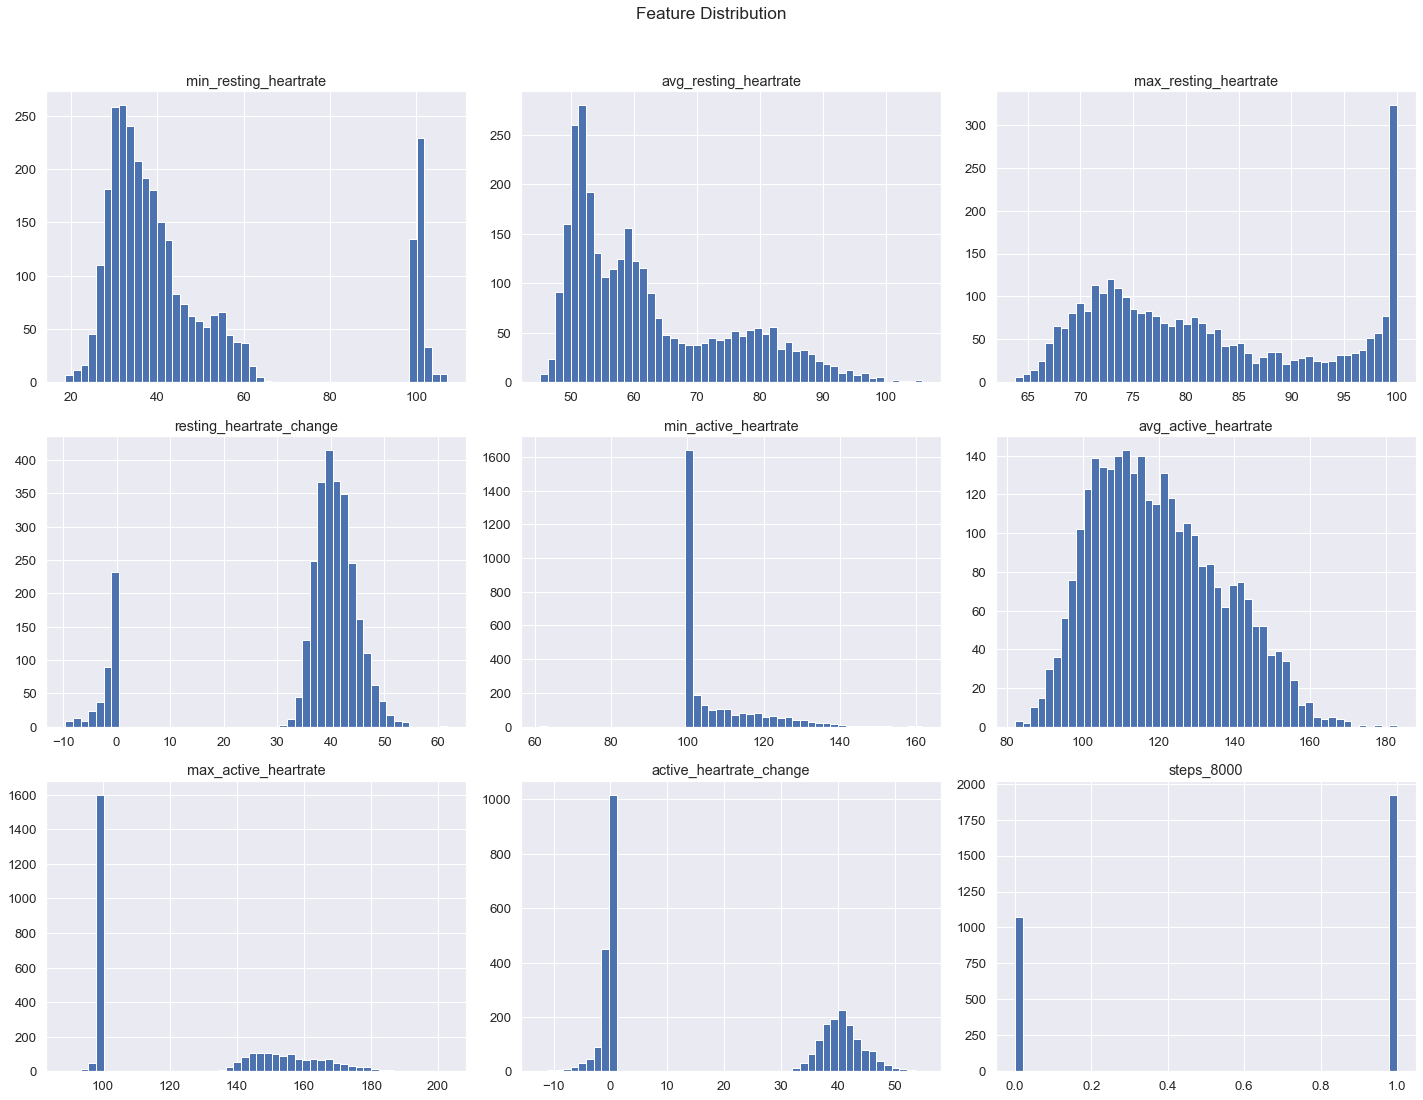

In [9]:
df.hist(bins=50, figsize=(20,15))
plt.suptitle('Feature Distribution', x=0.5, y=1.02, ha='center', fontsize='large')
plt.tight_layout()
plt.show()

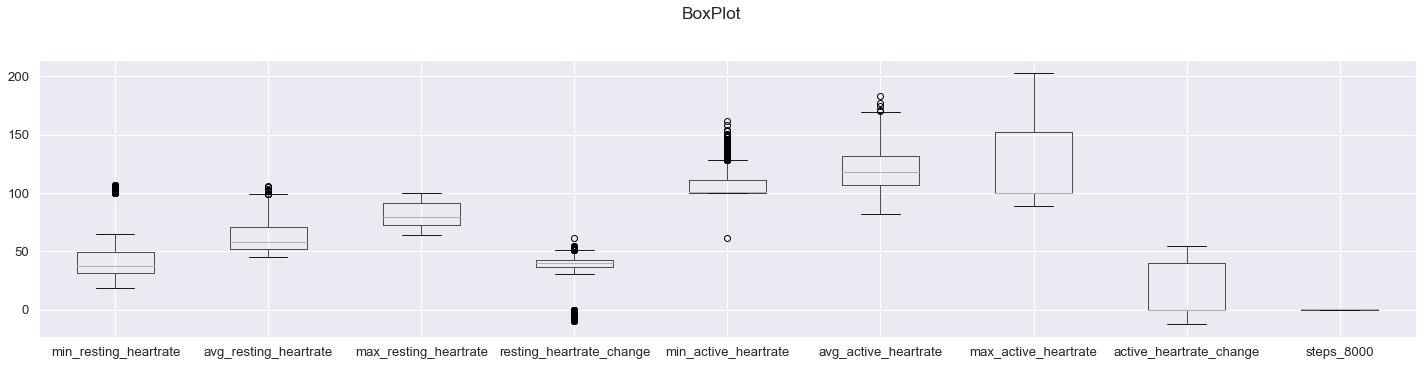

In [10]:
df.boxplot(figsize=(20,5))
plt.suptitle('BoxPlot', x=0.5, y=1.02, ha='center', fontsize='large')
plt.tight_layout()
plt.show()

### Correlation

In [11]:
df.corr()

,min_resting_heartrate,avg_resting_heartrate,max_resting_heartrate,resting_heartrate_change,min_active_heartrate,avg_active_heartrate,max_active_heartrate,active_heartrate_change,steps_8000
min_resting_heartrate,1.000000,0.917461,0.854134,-0.929004,0.660375,0.685939,0.662860,0.594208,-0.671097
avg_resting_heartrate,0.917461,1.000000,0.956361,-0.729413,0.740186,0.806261,0.770858,0.705034,-0.759171
max_resting_heartrate,0.854134,0.956361,1.000000,-0.601038,0.724665,0.813552,0.779423,0.724844,-0.753591
resting_heartrate_change,-0.929004,-0.729413,-0.601038,1.000000,-0.499196,-0.475232,-0.464050,-0.397383,0.495089
min_active_heartrate,0.660375,0.740186,0.724665,-0.499196,1.000000,0.895734,0.858422,0.696480,-0.707565
avg_active_heartrate,0.685939,0.806261,0.813552,-0.475232,0.895734,1.000000,0.903136,0.811623,-0.743849
max_active_heartrate,0.662860,0.770858,0.779423,-0.464050,0.858422,0.903136,1.000000,0.965950,-0.731989
active_heartrate_change,0.594208,0.705034,0.724844,-0.397383,0.696480,0.811623,0.965950,1.000000,-0.667112
steps_8000,-0.671097,-0.759171,-0.753591,0.495089,-0.707565,-0.743849,-0.731989,-0.667112,1.000000


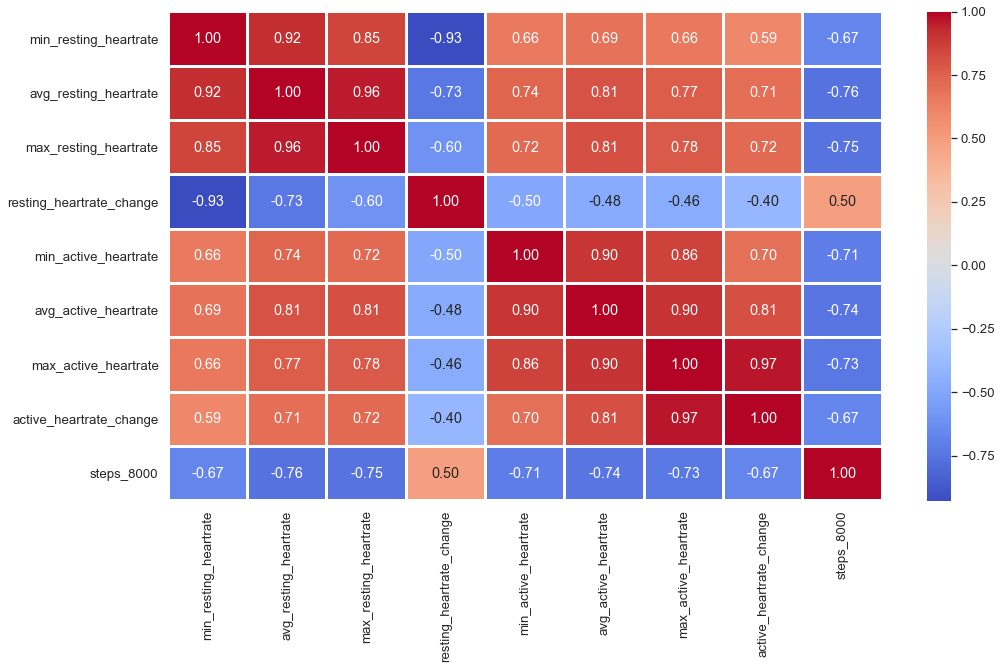

In [12]:
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(),cmap="coolwarm",annot=True,fmt='.2f',linewidths=2)
plt.show()

### Pairplots

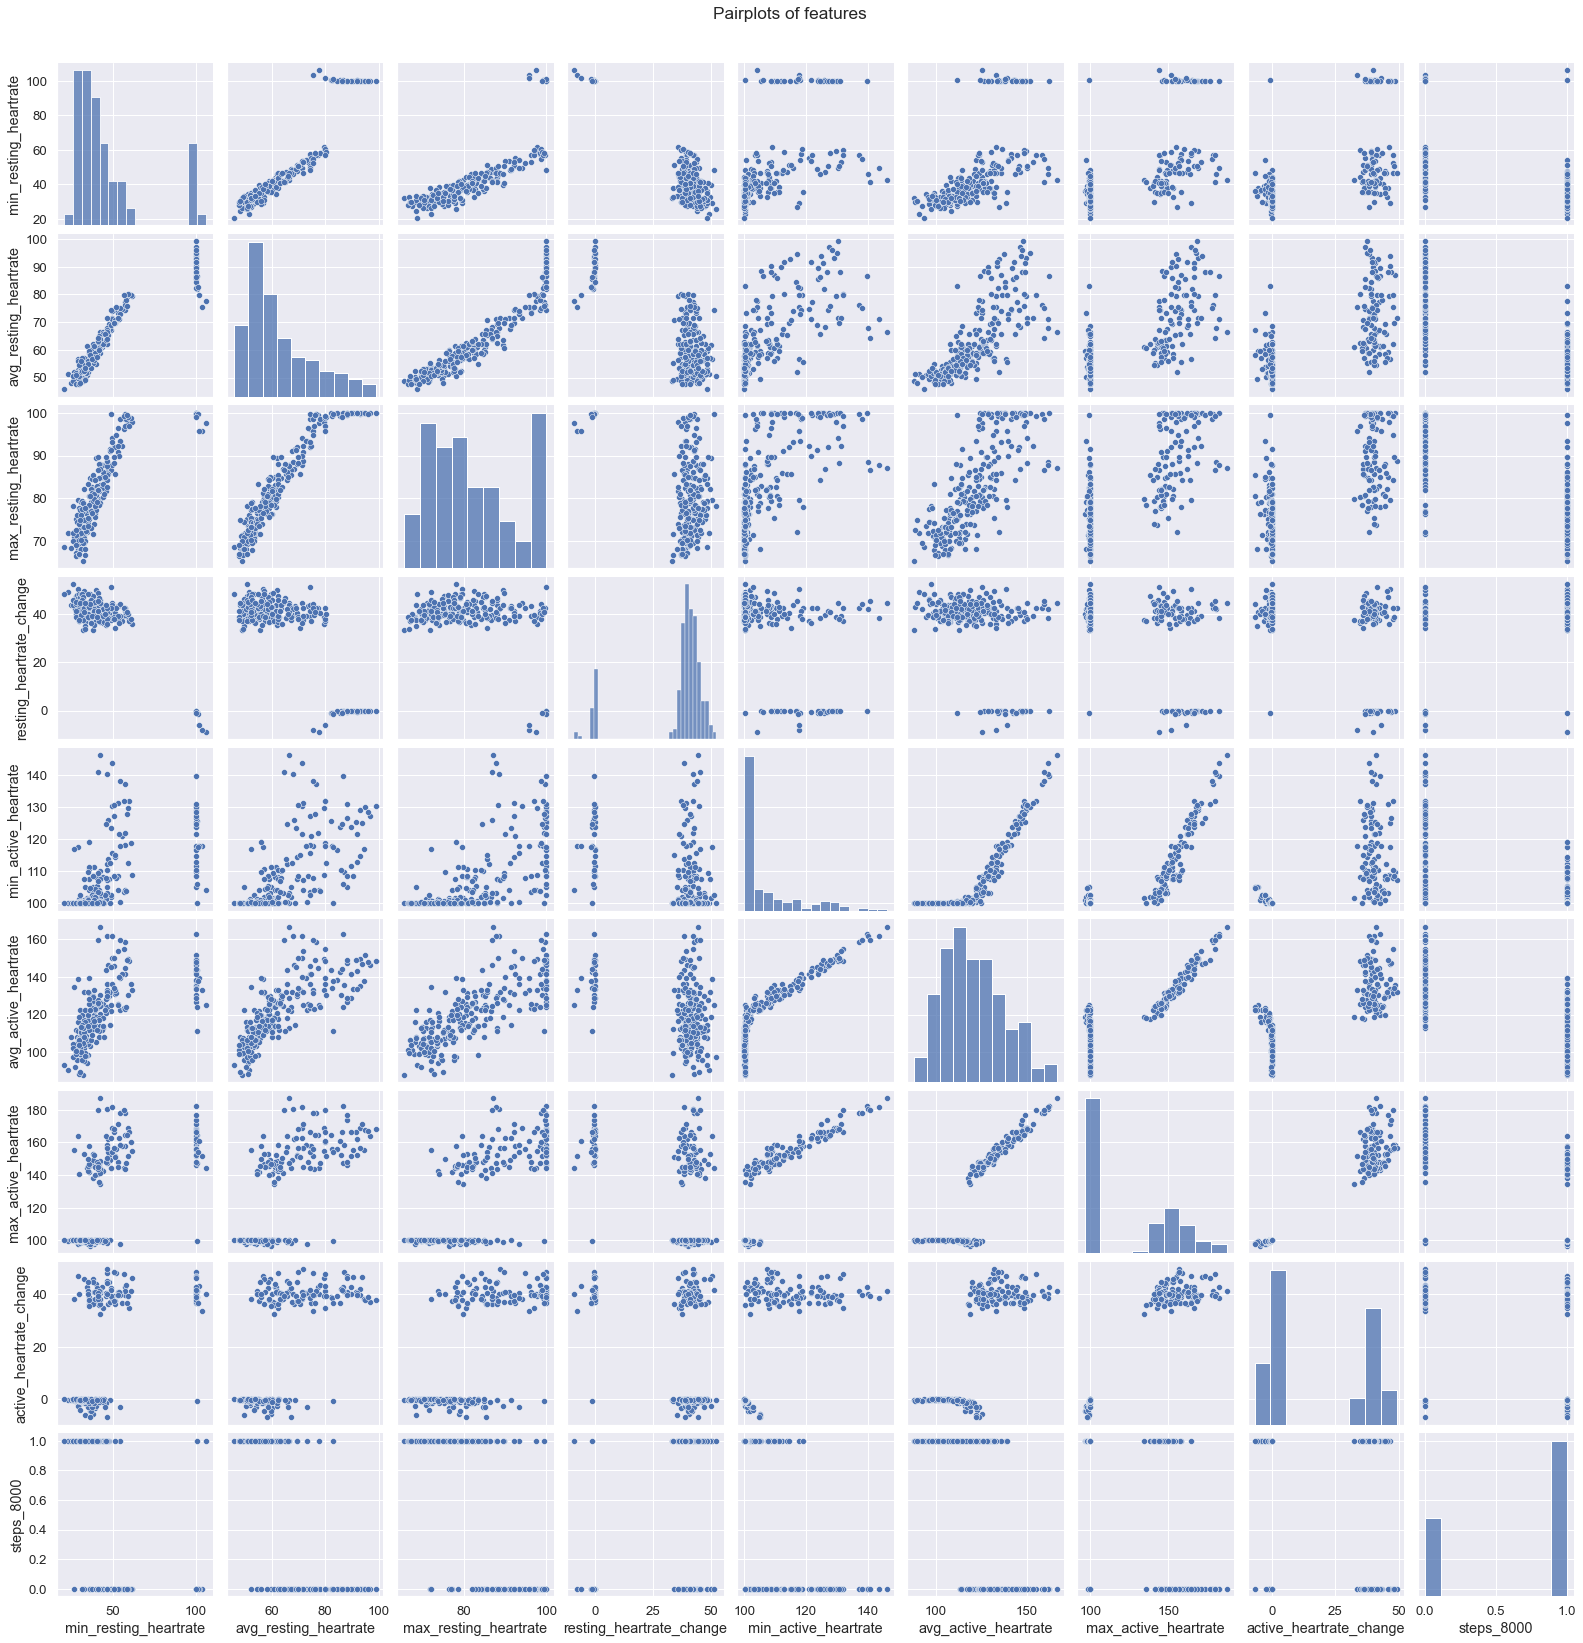

In [13]:
sns.pairplot(df.sample(250))
plt.suptitle('Pairplots of features', x=0.5, y=1.02, ha='center', fontsize='large')
plt.show()

### Data Preprocessing

### Treat Missing Values

In [14]:
df.isnull().sum()

min_resting_heartrate       0
avg_resting_heartrate       0
max_resting_heartrate       0
resting_heartrate_change    0
min_active_heartrate        0
avg_active_heartrate        0
max_active_heartrate        0
active_heartrate_change     0
steps_8000                  0
dtype: int64

### Treat Duplicate Values

In [15]:
df.duplicated(keep='first').sum()

0

### Train Test Split

In [16]:
df.shape

(3000, 9)

In [17]:
X = df.iloc[:,0:8]
y = df.iloc[:,8]

In [18]:
X.values, y.values

(array([[100.12190323,  82.68379728,  99.13828099, ..., 139.43487473,
         162.34782729,  42.04003593],
        [ 52.71287565,  77.73294229,  97.93773119, ..., 127.05715347,
         146.86986815,  37.82048164],
        [100.37366098,  86.51162896,  99.78933646, ..., 147.31573127,
         177.78314997,  48.23142186],
        ...,
        [102.1490871 ,  81.90773695,  99.97140766, ..., 148.37881155,
         168.12811449,  38.83468266],
        [ 53.33509302,  69.91086843,  91.67260662, ..., 140.81489091,
         159.87560408,  45.83623487],
        [100.06170256,  97.98210157,  99.85819596, ..., 139.56732889,
         162.42510427,  45.44057628]]),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int64))

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [20]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2400, 8), (600, 8), (2400,), (600,))

### Model Training

### Using Regression or Classification Models

In [25]:
rfc = RandomForestClassifier(random_state=0)

### Using GridSearchCV

In [26]:
model = RandomForestClassifier(random_state=0, n_estimators=100)

In [27]:
parameters = {'max_depth': [5, 8, 20],
              'n_estimators':[25, 50, 100],
              "min_samples_split": [2, 4],
              "max_features": [3, 4],
              "max_samples": [0.6, 0.8]
             }

In [28]:
len(parameters["max_depth"]) * len(parameters["n_estimators"]) * len(parameters["min_samples_split"]) * len(parameters["max_features"]) * len(parameters["max_samples"])

72

In [29]:
grids = GridSearchCV(estimator=model,param_grid=parameters,scoring='accuracy',
                     n_jobs=-1,cv=4,verbose=1,return_train_score=True)

In [30]:
grids.fit(X_train,y_train)

Fitting 4 folds for each of 72 candidates, totalling 288 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   20.6s
[Parallel(n_jobs=-1)]: Done 288 out of 288 | elapsed:   32.2s finished


GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': [5, 8, 20], 'max_features': [3, 4],
                         'max_samples': [0.6, 0.8], 'min_samples_split': [2, 4],
                         'n_estimators': [25, 50, 100]},
             return_train_score=True, scoring='accuracy', verbose=1)

In [31]:
grids.best_estimator_

RandomForestClassifier(max_depth=5, max_features=4, max_samples=0.6,
                       min_samples_split=4, random_state=0)

In [32]:
grids.cv_results_

{'mean_fit_time': array([0.13271648, 0.23179001, 0.45066094, 0.11926246, 0.23184717,
        0.44528663, 0.1352582 , 0.24190718, 0.4877336 , 0.13070869,
        0.23933613, 0.46564239, 0.14294684, 0.24940372, 0.49080271,
        0.13532394, 0.24125892, 0.47718865, 0.13066816, 0.27105463,
        0.57581866, 0.156362  , 0.26337576, 0.50950593, 0.13023955,
        0.22870022, 0.4454118 , 0.1397503 , 0.24336088, 0.51187712,
        0.17599195, 0.31428945, 0.62413955, 0.17069215, 0.3179211 ,
        0.64406776, 0.14528924, 0.25840425, 0.52055025, 0.12365901,
        0.25631183, 0.52310854, 0.16393501, 0.30663109, 0.58496451,
        0.16336149, 0.31363684, 0.61562526, 0.13119137, 0.25905836,
        0.46894002, 0.131284  , 0.30924767, 0.58480752, 0.15598458,
        0.3692081 , 0.80607271, 0.24410528, 0.54538721, 0.93836868,
        0.2036584 , 0.40637589, 1.18128014, 0.22686231, 0.30169678,
        0.60970485, 0.18853569, 0.31172812, 0.6688683 , 0.15783149,
        0.35046864, 0.62372303]

In [33]:
pd.DataFrame(grids.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_max_samples,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,mean_train_score,std_train_score
0,0.132716,0.007940,0.008055,0.003483,5,3,0.6,2,25,"{'max_depth': 5, 'max_features': 3, 'max_sampl...",0.903333,0.893333,0.876667,0.878333,0.887917,0.011016,30,0.903889,0.912222,0.918889,0.918889,0.913472,0.006166
1,0.231790,0.006380,0.017599,0.004350,5,3,0.6,2,50,"{'max_depth': 5, 'max_features': 3, 'max_sampl...",0.903333,0.893333,0.881667,0.881667,0.890000,0.009052,18,0.907778,0.913333,0.917778,0.916111,0.913750,0.003796
2,0.450661,0.010783,0.025125,0.004141,5,3,0.6,2,100,"{'max_depth': 5, 'max_features': 3, 'max_sampl...",0.905000,0.896667,0.883333,0.883333,0.892083,0.009233,5,0.908333,0.913889,0.917778,0.917778,0.914444,0.003869
3,0.119262,0.003838,0.009550,0.000877,5,3,0.6,4,25,"{'max_depth': 5, 'max_features': 3, 'max_sampl...",0.906667,0.893333,0.883333,0.878333,0.890417,0.010825,15,0.905556,0.910000,0.922222,0.917222,0.913750,0.006424
4,0.231847,0.006405,0.014568,0.004571,5,3,0.6,4,50,"{'max_depth': 5, 'max_features': 3, 'max_sampl...",0.905000,0.895000,0.880000,0.881667,0.890417,0.010232,14,0.909444,0.912222,0.916667,0.916111,0.913611,0.002953
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,0.311728,0.000036,0.014576,0.004573,20,4,0.8,2,50,"{'max_depth': 20, 'max_features': 4, 'max_samp...",0.893333,0.895000,0.870000,0.880000,0.884583,0.010232,51,0.997222,0.997222,0.996111,0.998889,0.997361,0.000992
68,0.668868,0.019543,0.023128,0.004143,20,4,0.8,2,100,"{'max_depth': 20, 'max_features': 4, 'max_samp...",0.895000,0.893333,0.875000,0.885000,0.887083,0.007939,41,0.999444,0.998333,0.998889,1.000000,0.999167,0.000621
69,0.157831,0.004133,0.010567,0.006417,20,4,0.8,4,25,"{'max_depth': 20, 'max_features': 4, 'max_samp...",0.900000,0.885000,0.858333,0.863333,0.876667,0.016791,71,0.983889,0.983333,0.987778,0.987778,0.985694,0.002093
70,0.350469,0.012092,0.014068,0.004016,20,4,0.8,4,50,"{'max_depth': 20, 'max_features': 4, 'max_samp...",0.901667,0.896667,0.861667,0.868333,0.882083,0.017336,60,0.990556,0.990000,0.989444,0.995556,0.991389,0.002437


In [34]:
grids.best_params_

{'max_depth': 5,
 'max_features': 4,
 'max_samples': 0.6,
 'min_samples_split': 4,
 'n_estimators': 100}

### Model Evaluation

In [35]:
y_pred = grids.predict(X_test)

In [36]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[145,  50],
       [ 16, 389]], dtype=int64)

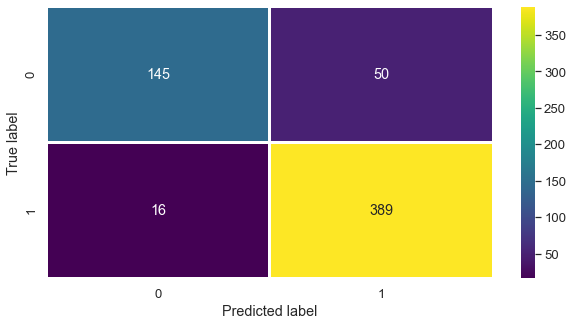

In [37]:
fig , ax = plt.subplots(figsize=(10,5))
sns.heatmap(cm, annot=True,fmt='.4g',linewidths=2, cmap='viridis')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [38]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.74      0.81       195
           1       0.89      0.96      0.92       405

    accuracy                           0.89       600
   macro avg       0.89      0.85      0.87       600
weighted avg       0.89      0.89      0.89       600



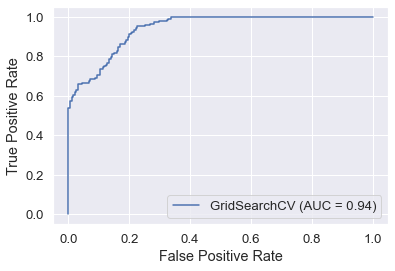

In [39]:
plot_roc_curve(grids,X_test,y_test)
plt.show()

### Cross-Validation

In [40]:
cv = cross_val_score(grids,X,y,cv=4,verbose=1,scoring='accuracy')

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 4 folds for each of 72 candidates, totalling 288 fits


[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done 288 out of 288 | elapsed:   25.8s finished


Fitting 4 folds for each of 72 candidates, totalling 288 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done 288 out of 288 | elapsed:   27.1s finished


Fitting 4 folds for each of 72 candidates, totalling 288 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    7.4s
[Parallel(n_jobs=-1)]: Done 288 out of 288 | elapsed:   30.0s finished


Fitting 4 folds for each of 72 candidates, totalling 288 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done 288 out of 288 | elapsed:   29.5s finished
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  1.9min finished


In [41]:
cv.mean()

0.8826666666666666